# Mode-Turbulence Coupling: Numerical Analysis

In [103]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [104]:
from scipy import integrate
import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math

## Generate delta T

#### To generate values for deta T, I created a Rayleigh distribution. I then used the inverse transform sampling to randomly generate values for delta T.

### Rayleigh Distribution
#### Source: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.rayleigh.html

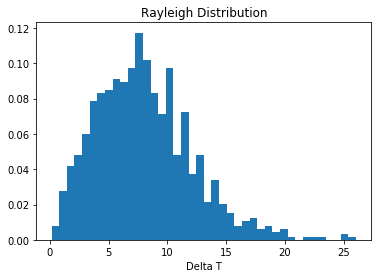

In [105]:
rayleigh = np.random.rayleigh(2*np.pi, 1000)
count, bins, ignored = plt.hist(rayleigh, 40, density=True)
plt.title("Rayleigh Distribution")
plt.xlabel("Delta T")
plt.show()

### Inverse Transform Sampling
#### Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

In [114]:
import scipy.interpolate as interpolate
                               
n_bins=40 
n_samples=30
hist, bin_edges = np.histogram(rayleigh, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
deltaT=inv_cdf(r)

print(deltaT)

[ 4.48566542  9.9602548  10.36799634  5.94360992  6.1964666   1.99937249
  4.24033959  5.81845979  8.57844552  5.05143639  3.28274319  8.46789775
  3.45007928 12.56083786  9.10525116  4.06067756  5.50156494  4.77488251
  4.53883211  4.81968165  9.2282726   1.92348703  3.74987381 10.35244991
 13.4575246   3.38561558  8.49572101  7.35346787  8.48917806  7.87967179]


In [107]:
# Tturb adds up the delta T's
Tturb=[0]
for i in range(len(deltaT)-1):
    Tturb.append(deltaT[i]+Tturb[i])
print("Tturb values are:", Tturb)

Tturb values are: [0, 2.1507591839465863, 6.9014673194040554, 16.13058625557017, 29.176993143711194, 33.79935177258082, 44.53648820017529, 55.9504765109218, 68.58697700024652, 75.70673969281151, 80.82993949724737, 91.26788828899345, 97.14018515151619, 98.50030799794845, 108.12803426045683, 110.00078546440453, 117.82153109692567, 135.28307606835446, 145.3083733552199, 152.77445995736784, 162.86313685097596, 166.1602302521478, 172.4133367698914, 180.90209560762875, 184.96373272188592, 195.10088078254594, 202.9586917778525, 209.16848858776274, 212.73022980613197, 223.67284833598234]


In [108]:
# t is the sum of half way points of consecutive delta T's
t=[]
for i in range(len(deltaT)-1):
    t.append((deltaT[i])/2+(deltaT[i+1])/2)
print("t values are:", t)

t values are: [3.4507336597020277, 6.989913535811791, 11.137762912153569, 8.834382758505324, 7.679747528232049, 11.075562369170491, 12.025244400035614, 9.878131590944852, 6.1214812485004195, 7.780574298090965, 8.155122827134413, 3.6162098544775043, 5.493924554470316, 5.750238733228033, 4.846748418234413, 12.641145301974962, 13.74342112914712, 8.745691944506685, 8.777381747878028, 6.692885147389987, 4.775099959457722, 7.370932677740475, 6.275197975997257, 7.099392587458594, 8.997479527983288, 7.03380390260839, 4.885769014139729, 7.252179874109798, 10.992798914980849]


## Generate F1
### To generate F1, I generate a new Gaussian Markov Distribution for each time t. I then use an inverse transform sampling to randomly choose values for F1.

### Gaussian Markov Distribution

Text(0, 0.5, 'Prob(F1)')

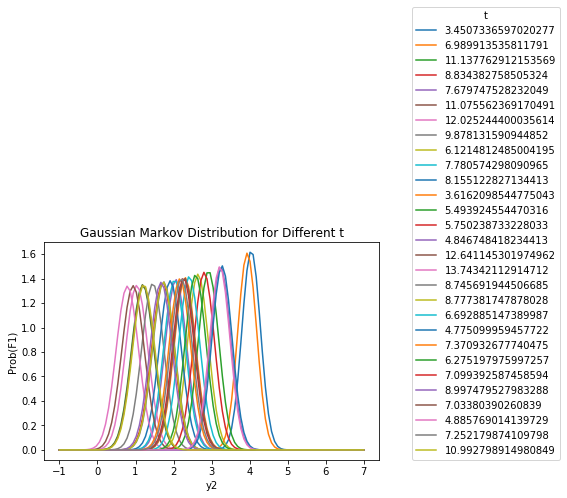

In [144]:
mean = 0
std = .3
Tr=2*np.pi

vart=[]
meant=[]
y1=7
y2=np.linspace(-1,7,100)
prob=[]
       
#in this loop, a new variance (standard devˆ2), mean, and probability distribution is calculated and plotted for each time t
    
for i in range(len(t)):
    arr=[]
    a=t[i]
    vart=((1-math.exp(-2*a/Tr))*std**2)
    meant=(mean+math.exp(-a/Tr))*(y1-mean)
    for j in range(len(y2)):
        p1=1/((2*np.pi*vart)**(1/2))
        p2=math.exp(-(y2[j]-meant)**2*(2*vart)**(-1))
        arr.append(p1*p2)
    prob.append(arr)
    plt.plot(y2, arr)
    
#vart is the time-dependent variance
#meant is the time-dependent mean
       
plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0), title="t")
plt.xlabel("y2")
plt.ylabel("Prob(F1)")

### Inverse Transform Sampling
#### Source: https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/

In [145]:
import scipy.interpolate as interpolate

n_bins=40
n_samples=30
hist, bin_edges = np.histogram(prob, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
F1=inv_cdf(r)

print("F1 values are ", F1)

F1 values are  [1.84126379e-02 3.24993571e-02 3.94593221e-02 1.02057377e-02
 1.30543623e-03 3.52297327e-02 1.26966926e-02 8.99818803e-03
 1.41146659e+00 7.84758291e-03 1.48327754e-02 1.02567197e-02
 6.86381450e-03 1.99590782e-02 2.12024366e-02 1.60625828e-02
 1.85151264e-02 8.01117168e-03 7.18271807e-03 1.34571610e+00
 5.54409836e-01 2.86235080e-03 9.46917432e-03 2.42239918e-02
 2.21356082e-02 3.53336881e-02 3.43757290e-02 7.01317277e-03
 1.84319304e-03 1.84060294e-02]


## Generate F2
### To generate F2, I generate a new Gaussian Markov Distribution for each time t.  I then use an inverse transform sampling to randomly choose values for F2.

### Gaussian Markov Distribution

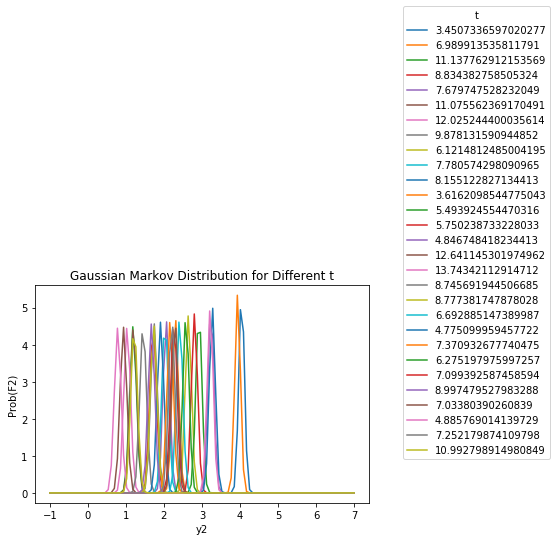

In [146]:
mean = 0
std =.09
x = np.linspace(-1,1,100)
Tr=2*np.pi

vart=[]
meant=[]
y1=7
y2=np.linspace(-1,7,100)
prob=[]
       
#in this loop, a new variance (standard devˆ2), mean, and probability distribution is calculated and plotted for each time t
    
for i in range(len(t)):
    arr=[]
    a=t[i]
    vart=((1-math.exp(-2*a/Tr))*std**2)
    meant=(mean+math.exp(-a/Tr))*(y1-mean)
    for j in range(len(y2)):
        p1=1/((2*np.pi*vart)**(1/2))
        p2=math.exp(-(y2[j]-meant)**2*(2*vart)**(-1))
        arr.append(p1*p2)
    prob.append(arr)
    plt.plot(y2, arr)
    
#vart is the time-dependent variance
#meant is the time-dependent mean

plt.title("Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0.2), title="t")
plt.xlabel("y2")
plt.ylabel("Prob(F2)")

prob.remove(prob[0])

In [148]:
import scipy.interpolate as interpolate

n_bins=40
n_samples=30
hist, bin_edges = np.histogram(prob, bins=n_bins, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)
F2=inv_cdf(r)

print("Values for F2 are ", F2)

Values for F2 are  [4.60097574e-02 1.16535551e-01 1.09128371e-01 8.45989497e-02
 1.74605592e-03 4.35449856e-02 1.19374940e-02 3.32721976e+00
 4.15916979e-02 5.29333921e+00 1.86306244e-02 7.65415703e-02
 2.30052447e-02 6.60516598e-03 5.56326140e-02 1.18278644e-01
 1.20078633e-01 5.90134686e-02 1.28816577e-01 1.05811162e-01
 9.41022321e-02 5.94154948e-02 8.26040202e-02 1.80213941e+00
 2.06583037e-02 5.56995180e-02 1.25047000e-01 1.09791643e-01
 8.45031079e-02 9.76047997e-02]


## Generate G1
#### To Generate G1, I take the derivative of F1 by taking the difference of F1 values at times halfway between consecutive delta T's and divide that by the difference in those times.

In [150]:
G1=[]
for i in range(len(F1)-1):
    G1.append((F1[i]-F1[i+1])/(deltaT[i]+deltaT[i+1]))
print("G1 values are ", G1)

G1 values are  [-0.0009751347765708002, -0.0003423789380646068, 0.001793421443319447, 0.0007331338824313561, -0.004139209680969192, 0.003611230753614838, 0.0003676884697274945, -0.09741457400264711, 0.10298100980815532, -0.0008381379890826124, 0.00038943030517925493, 0.000284688016330734, -0.0008178959150703407, -5.738730000044975e-05, 0.0003903905187794993, -0.0002564820453136664, 0.0010221387026127977, 8.894985986686318e-05, -0.14302841461227228, 0.05632893260123215, 0.04945833689924074, -0.0011645343406362562, -0.0010462685299361678, 8.77104501744585e-05, -0.0007835878433737987, 8.062722112692752e-05, 0.0017264325904557847, 0.0003263330986539598, -0.0010118509557678849]


# Everything below this point is not finished.

## During delta T, take V(T) to be constant

In [102]:
#F2=constant=c
#1+G1=constant=b
#F1=constant=a

[0.001942489390189693, 0.0016214638483916053, -5.0077600502723e-07, -0.0027658812891505425, -0.0025652953557421415, -0.0028239613295381453, -0.01877722995414063, 0.008374573416664281]
0.0068675519309677625
-0.10794666787150367
-0.08165307851553313
-0.07781138435346427
-0.010280254755685975
-0.011352311508110825
-0.1317384007666572
0.032786042821409934


/Users/celiatandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0.5, 1.0, 'Amplitude')

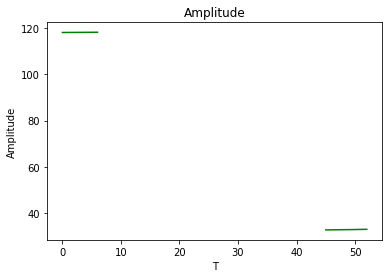

In [138]:
A=[]
t=[]

for i in range(len(Tturb)-2):
    a=F1[i]
    b=G1[i]
    c=F2[i]
    print(4*b-a**2)
    Ttemp=np.linspace(Tturb[i], Tturb[i+1])
    for j in Ttemp:
        t.append(j)
        A.append(math.exp(-a*j/2)*(math.sin(1/2*(4*b-a**2)**(1/2)*j)+math.cos(1/2*(4*b-a**2)**(1/2)*j))+c/b)

plt.plot(t, A, 'g')
plt.xlabel('T')
plt.ylabel('Amplitude')
plt.title('Amplitude')

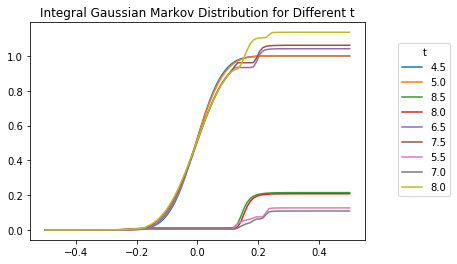

In [30]:
#integral=[]

#for element in prob:
#    integral.append(scipy.integrate.cumtrapz(element, x))

#ttt=np.linspace(-.5, .5, 99)
#for element in integral:
#    plt.plot(ttt,element)

#plt.title("Integral Gaussian Markov Distribution for Different t")
#plt.legend(labels=t, loc=(1.1,0.2), title="t")

In [31]:
#F1=[]
#for element in prob:
#    ran=random.choice(element)
#   F1.append(ran)
#print("F1 values are ", F1)

F1 values are  [0.0004546483600490276, 4.9284615493274755, 0.09987665440788548, 0.003056925237662128, 8.408765862983317e-07, 0.022320999166221267, 1.4432263540771068e-06, 1.139595150196684e-86, 0.04780179018937328]


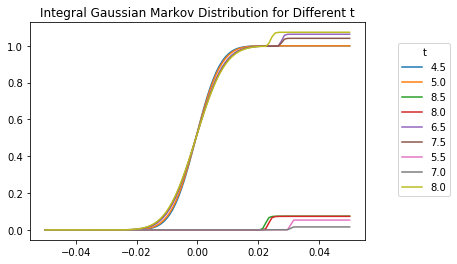

In [37]:
integral=[]

for element in prob:
    integral.append(scipy.integrate.cumtrapz(element, x))

ttt=np.linspace(-.05, .05, 99)
for element in integral:
    plt.plot(ttt,element)

plt.title("Integral Gaussian Markov Distribution for Different t")
plt.legend(labels=t, loc=(1.1,0.2), title="t")

In [35]:
F2=[]
for element in prob:
    ran=random.choice(element)
    F2.append(ran)
print("F2 values are ", F2)

F2 values are  [4.610553032214823e-12, 5.870511509219274e-10, 0.0, 0.0, 6.621486349563129, 12.430298655728059, 0.0, 0.0, 27.582563892140858]
